In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
import itertools
import pandas as pd
import numpy as np

In [123]:
booking_data = pd.read_csv('data/Passanger_booking_data.csv')
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [124]:
unique_count = []
for x in booking_data.columns:
    unique_count.append([x, len(booking_data[x].unique()), booking_data[x].isnull().sum()])
pd.DataFrame(unique_count, columns=['Column', 'Unique', 'Missing']).set_index('Column')

,Unique,Missing
Column,,
num_passengers,9,0
sales_channel,2,0
trip_type,3,0
purchase_lead,470,0
length_of_stay,336,0
flight_hour,24,0
flight_day,7,0
route,799,0
booking_origin,104,0


In [125]:
review_data = pd.read_csv('data/AirlineScrappedReview.csv')
review_data.head()

,Unnamed: 0,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,0,Paige Boet,June 2023,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,1,S Layne,March 2023,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,3,Joel Burman,June 2023,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [126]:
unique_count = []
for x in review_data.columns:
    unique_count.append([x, len(review_data[x].unique()), review_data[x].isnull().sum()])
pd.DataFrame(unique_count, columns=['Column', 'Unique', 'Missing']).set_index('Column')

,Unique,Missing
Column,,
Unnamed: 0,3580,0
Passanger_Name,2764,0
Flying_month,1174,0
Route,744,0
Rating,10,0
Verified,2,0
Review_title,2570,0
Review_content,3506,0
Traveller_type,203,0


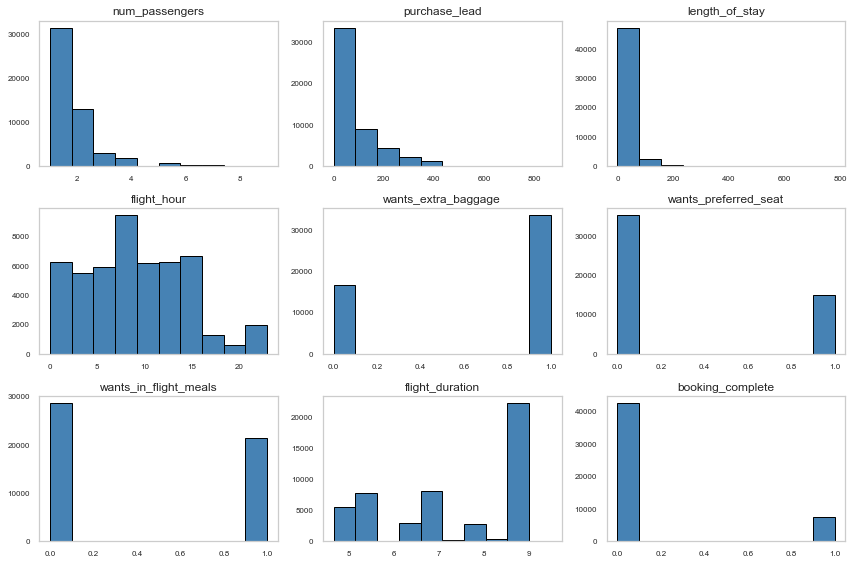

In [127]:
booking_data.hist(bins=10, color='steelblue', 
           edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

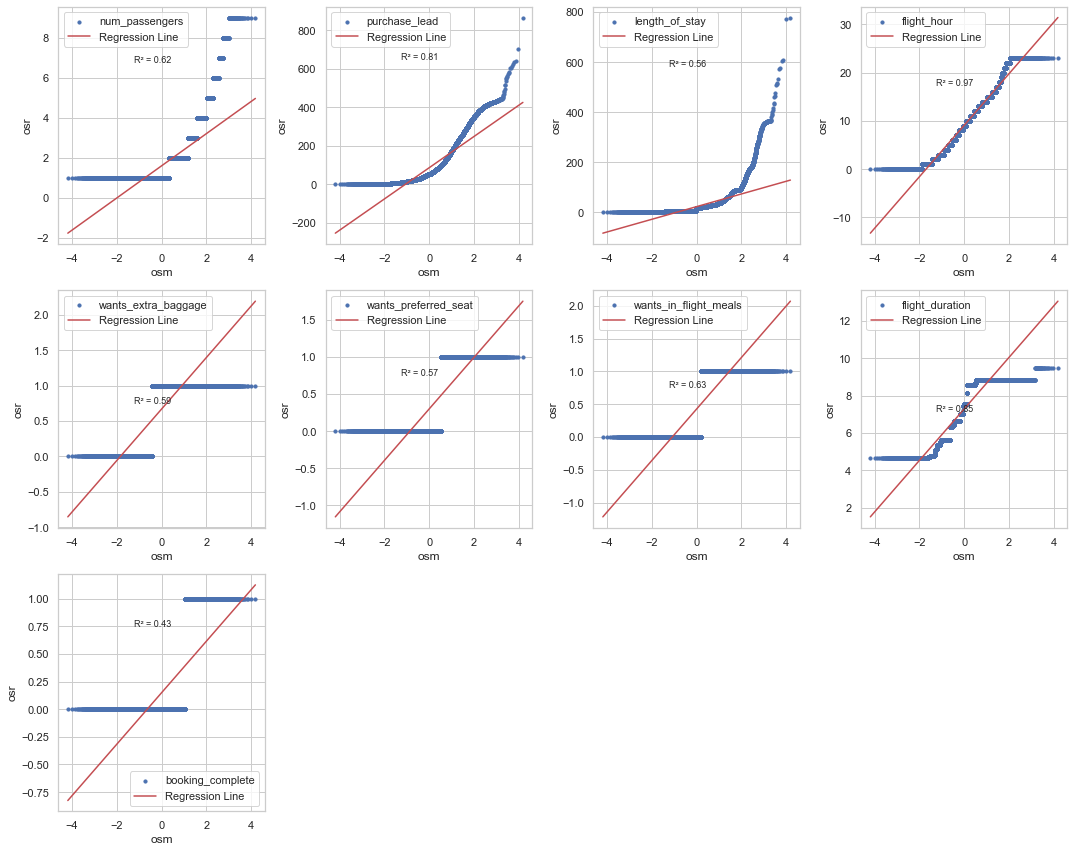

In [128]:
cat_features = np.array([i for i in booking_data.columns.tolist() if booking_data[i].dtype == 'object'])
num_features = np.array([i for i in booking_data.columns.tolist() if booking_data[i].dtype != 'object'])

from scipy.stats import probplot
features = num_features

num_plots = len(features)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

for i, feature_column in enumerate(features):
    ax = axes[i // num_cols, i % num_cols]
    
    (osm, osr), (slope, intercept, R) = probplot(booking_data[feature_column].dropna(), rvalue=True)
    x_theory = np.array([osm[0], osm[-1]])
    y_theory = intercept + slope * x_theory
    R2 = f"R\u00b2 = {R * R:.2f}"
    
    ax.scatter(x=osm, y=osr, s=10, c='b', label=feature_column)
    ax.plot(x_theory, y_theory, color='r', linestyle='-', label='Regression Line')
    ax.text(-1.25, osr[-1] * 0.75, R2, fontsize=9)
    
    ax.set_ylabel("osr")
    ax.set_xlabel("osm")
    
    ax.legend()
  
if num_plots % num_cols != 0:
    empty_plots = num_cols - (num_plots % num_cols)
    for i in range(empty_plots):
        fig.delaxes(axes[num_rows-1, num_cols-1-i])

plt.tight_layout()
plt.show()

In [129]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [130]:
def visualize_distribution(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  
                                           sharex=True,  
                                           gridspec_kw={"height_ratios": (0.25, 0.75)},
                                           figsize=figsize)  
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True)  
    sns.histplot(data=data, x=feature, 
                 kde=kde, ax=ax_hist2, 
                 bins=bins, palette="winter") if bins else sns.histplot(data=data, 
                                                                        x=feature, 
                                                                        kde=kde, ax=ax_hist2)  
    ax_hist2.axvline(data[feature].mean(), color="green")  
    ax_hist2.axvline(data[feature].median(), color="black")  

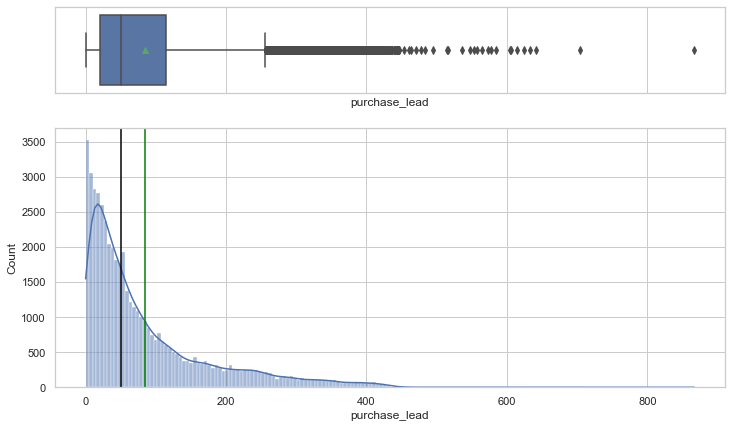

In [157]:
visualize_distribution(booking_data, 'purchase_lead', kde=True)

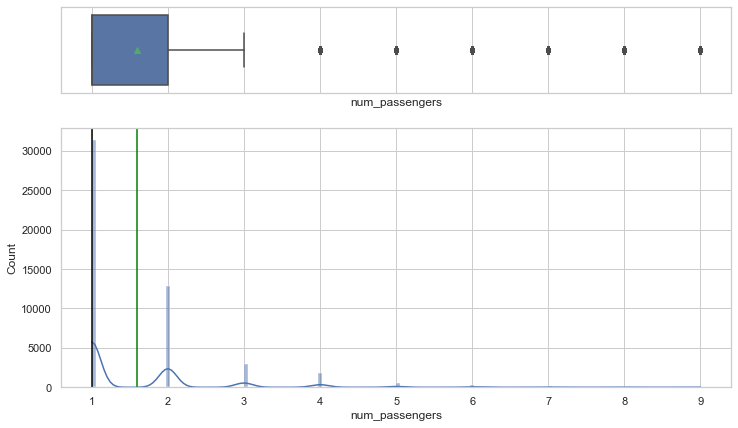

In [131]:
visualize_distribution(booking_data, 'num_passengers', kde=True)

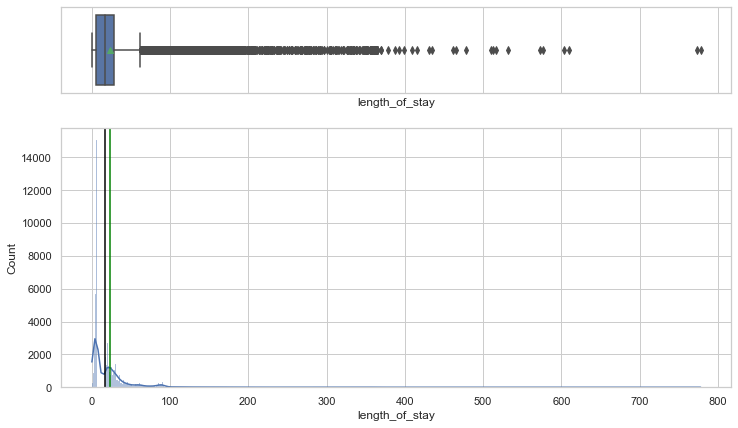

In [133]:
visualize_distribution(booking_data, 'length_of_stay', kde=True)

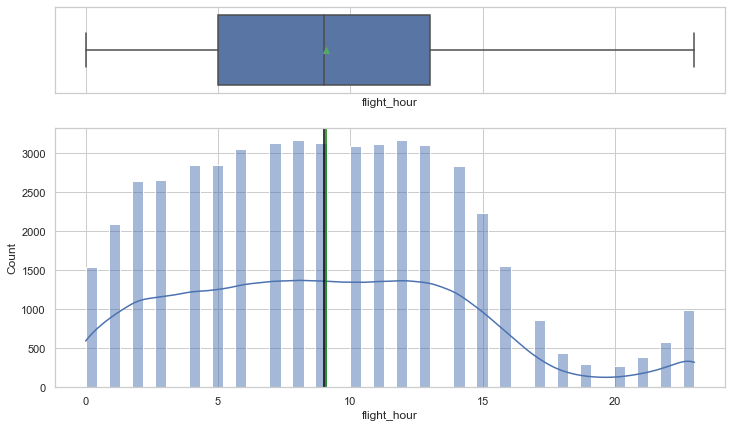

In [134]:
visualize_distribution(booking_data, 'flight_hour', kde=True)

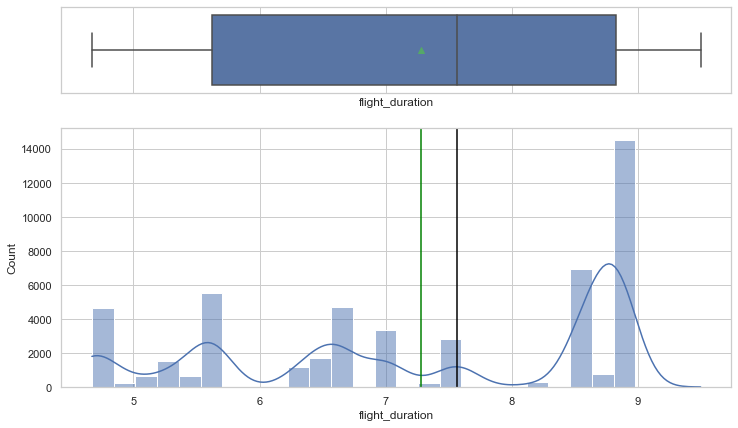

In [135]:
visualize_distribution(booking_data, 'flight_duration', kde=True)

In [137]:
booking_data['is_weekend'] = booking_data['flight_day'].isin(['Sat', 'Sun']).astype(int)

booking_data['length_of_stay_cat'] = pd.cut(booking_data['length_of_stay'], 
                                   bins=[0, 3, 7, np.inf], 
                                   labels=['short', 'medium', 'long'])   

booking_data['flight_hour_cat'] = pd.cut(booking_data['flight_hour'], 
                                bins=[0,8,12,18,24], 
                                labels=['morning', 'afternoon', 'evening', 'night'])

booking_data['extra_baggage_ratio'] = booking_data['wants_extra_baggage'] / booking_data['num_passengers'] * 100

booking_data['total_services'] = booking_data['wants_extra_baggage'] + booking_data['wants_preferred_seat'] + booking_data['wants_in_flight_meals']

# One-hot encode columns    
# df = pd.get_dummies(booking_data, columns=['sales_channel', 'trip_type', 'route'])

In [161]:
corr = booking_data.corr()
abs_correlation_matrix = corr.abs()

top_correlations = abs_correlation_matrix[abs_correlation_matrix < 1.0].unstack().sort_values(ascending=False)[:15]

top_correlations_unique = top_correlations.drop_duplicates()
top_correlations_unique

extra_baggage_ratio    wants_extra_baggage     0.831744
wants_in_flight_meals  total_services          0.737757
total_services         wants_preferred_seat    0.707878
                       wants_extra_baggage     0.670118
                       extra_baggage_ratio     0.547632
num_passengers         extra_baggage_ratio     0.321391
wants_in_flight_meals  wants_preferred_seat    0.315120
length_of_stay         extra_baggage_ratio     0.234286
dtype: float64

<AxesSubplot:>

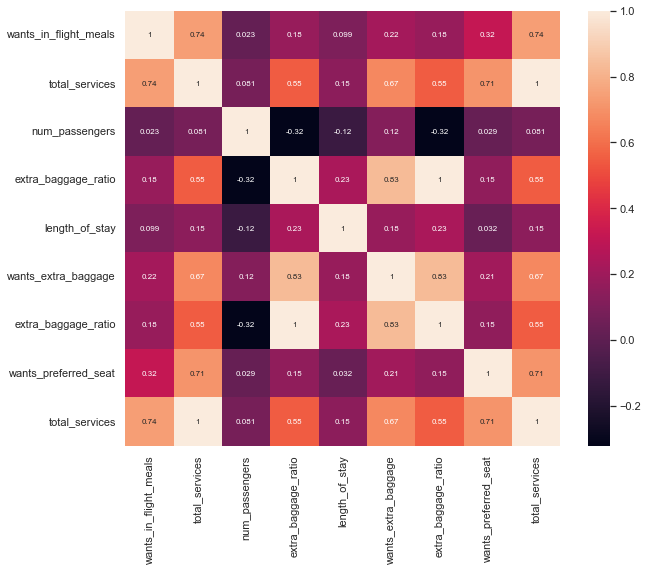

In [159]:
top_correlations = booking_data.corr().unstack().sort_values(kind="quicksort")

feature_names = list(set(top_correlations_unique.index.get_level_values(0)))
feature_names += list(set(top_correlations_unique.index.get_level_values(1)))

top_correlation_matrix = booking_data[feature_names].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True,annot_kws={'fontsize': 8}, square=True)

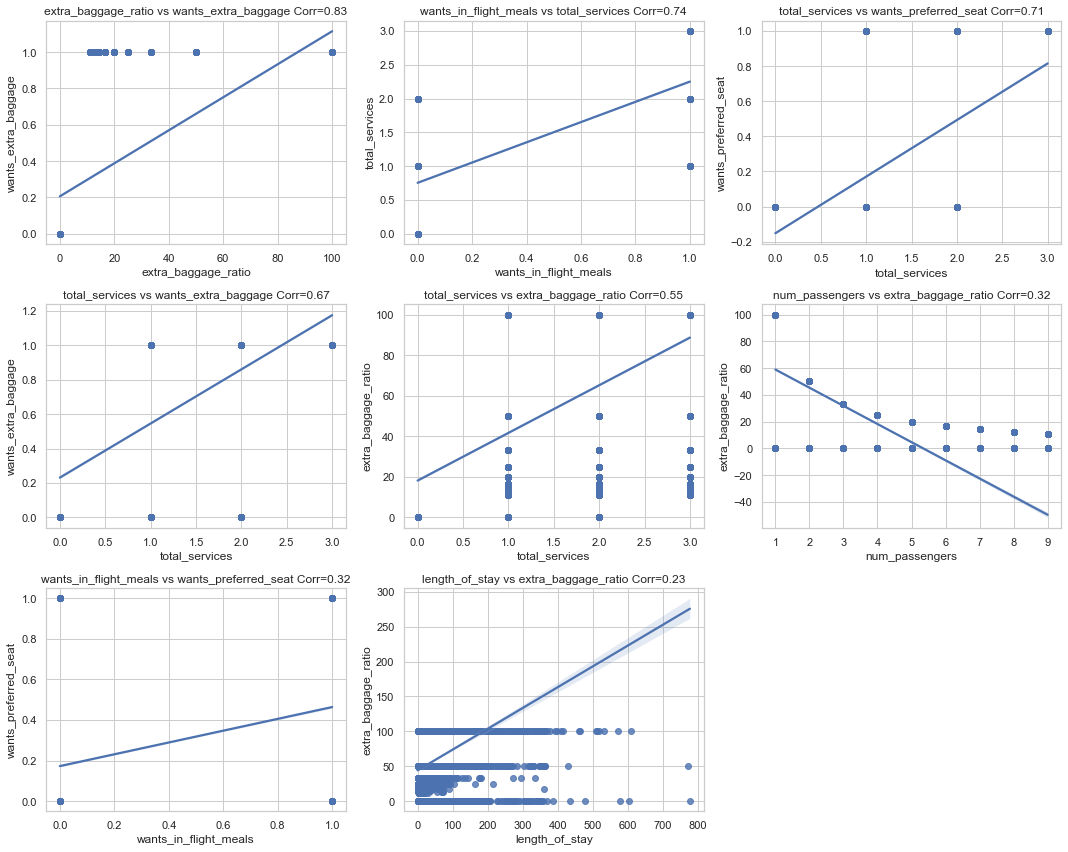

In [142]:
num_plots = len(top_correlations_unique.index)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

for i, (feature1, feature2) in enumerate(top_correlations_unique.index):
    ax = axes[i // num_cols, i % num_cols]
    sns.regplot(data=booking_data, x=feature1, y=feature2, ax=ax)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f'{feature1} vs {feature2} Corr={top_correlations_unique[i]:.2f}')

if num_plots % num_cols != 0:
    empty_plots = num_cols - (num_plots % num_cols)
    for i in range(empty_plots):
        fig.delaxes(axes[num_rows-1, num_cols-1-i])

plt.tight_layout()
plt.show()

In [143]:
name_type = {0: "not completed", 1: "completed"}
booking_data['booking_complete_cat'] = booking_data['booking_complete'].map(name_type)
booking_data['booking_complete_cat'].value_counts()

not completed    42523
completed         7479
Name: booking_complete_cat, dtype: int64

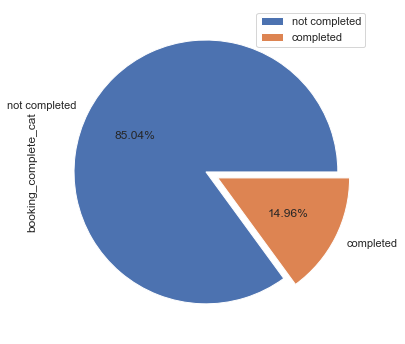

In [164]:
plt.figure(figsize = (13,9))
plt.subplot(1,2,1)
booking_data['booking_complete_cat'].value_counts().plot(kind = 'pie', autopct = '%.2f%%',  
                                     explode = [0, 0.1])
plt.legend()

booking_complete_cat  completed  not completed
sales_channel                                 
Internet                   6870          37513
Mobile                      609           5010
------------------------------------------------------------------------------------------------------------------------


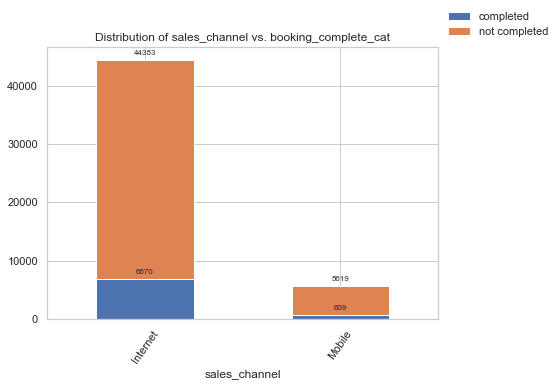

booking_complete_cat  completed  not completed
trip_type                                     
RoundTrip                  7454          42044
OneWay                       20            367
CircleTrip                    5            112
------------------------------------------------------------------------------------------------------------------------


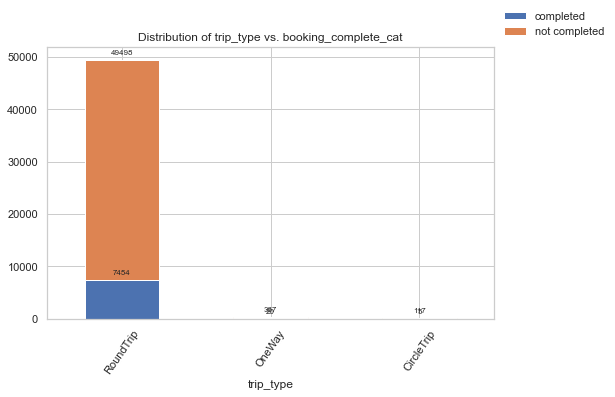

booking_complete_cat  completed  not completed
flight_day                                    
Mon                        1204           6898
Wed                        1252           6423
Tue                        1130           6544
Thu                        1122           6302
Fri                         983           5778
Sun                         927           5627
Sat                         861           4951
------------------------------------------------------------------------------------------------------------------------


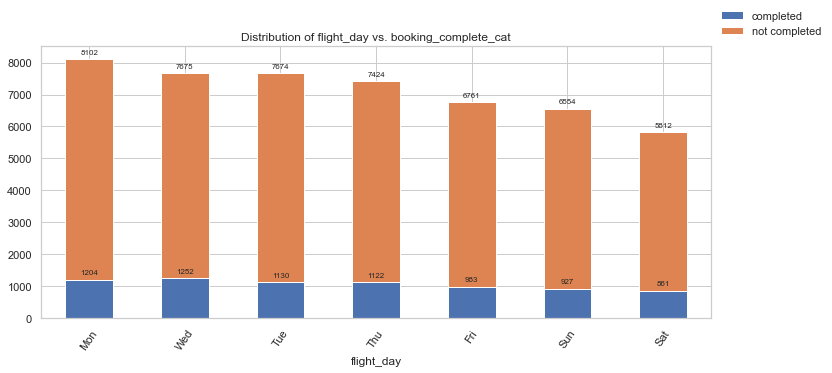

booking_complete_cat  completed  not completed
route                                         
AKLKUL                      567           2113
PENTPE                      401            523
MELSGN                       43            799
ICNSIN                       90            711
DMKKIX                      187            557
...                         ...            ...
PERVTE                        0              1
BDOWUH                        0              1
CNXXIY                        0              1
MELNRT                        1              0
URTXIY                        0              1

[799 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


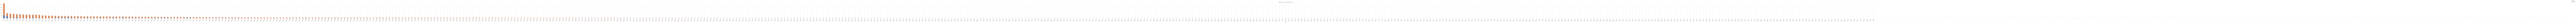

booking_complete_cat  completed  not completed
booking_origin                                
Australia                   901          16972
Malaysia                   2468           4706
South Korea                 462           4097
Japan                       478           3407
China                       694           2693
...                         ...            ...
Seychelles                    1              0
Norfolk Island                0              1
Pakistan                      1              0
Panama                        0              1
Nicaragua                     0              1

[104 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------


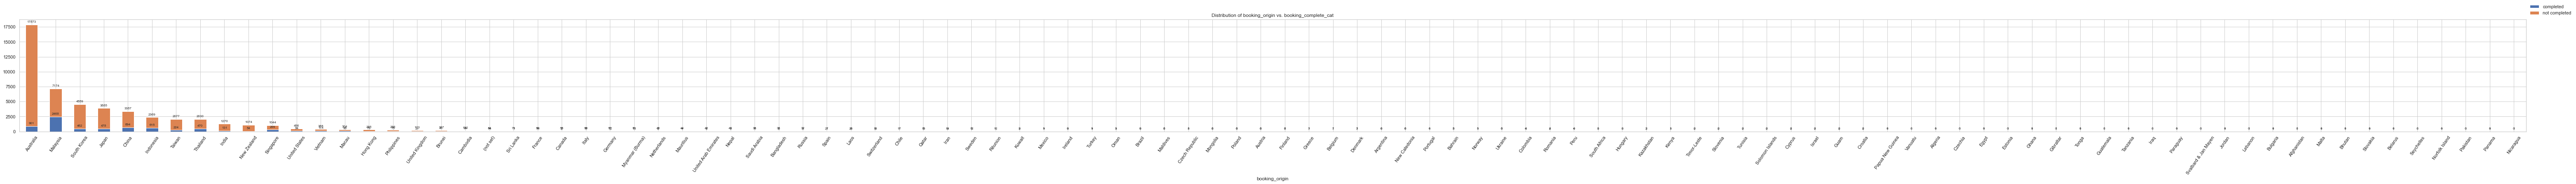

In [145]:
for feature in cat_features:
    count = len(booking_data[feature].unique())
    crosstab = pd.crosstab(booking_data[feature], booking_data['booking_complete_cat'])
    sorter = crosstab.sum(axis=1).sort_values(ascending=False).index
    crosstab = crosstab.loc[sorter]
    print(crosstab)
    print("-" * 120)
    ax = crosstab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    ax.legend(loc="lower left", frameon=False, bbox_to_anchor=(1, 1))
    ax.set_title("Distribution of {} vs. {}".format(feature, 'booking_complete_cat'))
    plt.xticks(rotation=55)
    ax.set_xlabel(feature)
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=8, padding=4)
    plt.show()

In [146]:
from sklearn.impute import SimpleImputer

review_data = review_data.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
review_data.iloc[:,:] = mean_imputer.fit_transform(review_data)

In [147]:
unique_count = []
for x in review_data.columns:
    unique_count.append([x, len(review_data[x].unique()), review_data[x].isnull().sum()])
pd.DataFrame(unique_count, columns=['Column', 'Unique', 'Missing']).set_index('Column')

,Unique,Missing
Column,,
Unnamed: 0,3580,0
Passanger_Name,2764,0
Flying_month,1174,0
Route,744,0
Rating,10,0
Verified,2,0
Review_title,2570,0
Review_content,3506,0
Traveller_type,203,0


In [156]:
review_data.head()

,Unnamed: 0,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,0,Paige Boet,June 2023,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,1,S Layne,March 2023,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,3,Joel Burman,June 2023,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [149]:
review_data['Review_title'].value_counts()

British Airways customer review    952
never fly British Airways again      5
Overall a good flight                5
BA has gone downhill                 3
one of the worst experiences         3
                                  ... 
extremely run down and shabby        1
offered me no compensation           1
Charging to choose seats             1
offered me half the money            1
cannot fault the service             1
Name: Review_title, Length: 2570, dtype: int64

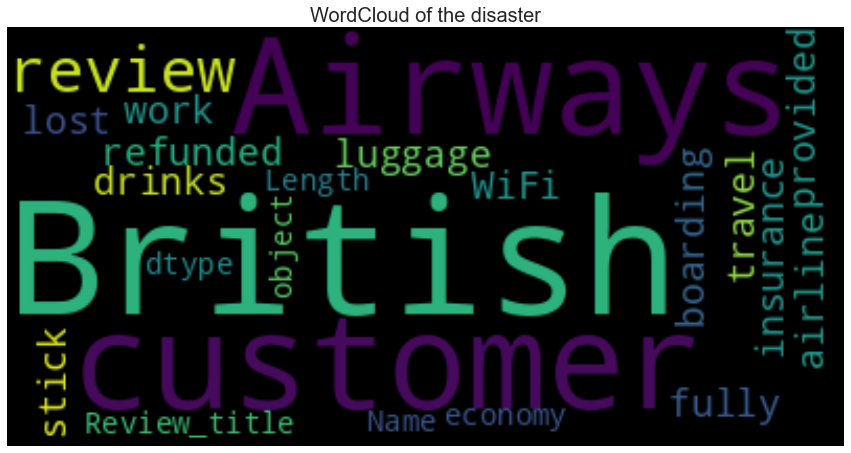

In [150]:
from wordcloud import WordCloud 

WordCloud_Review_title = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((review_data['Review_title'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_Review_title, interpolation='bilinear')
plt.title('WordCloud of the disaster', fontsize=20)
plt.axis("off")
plt.show()

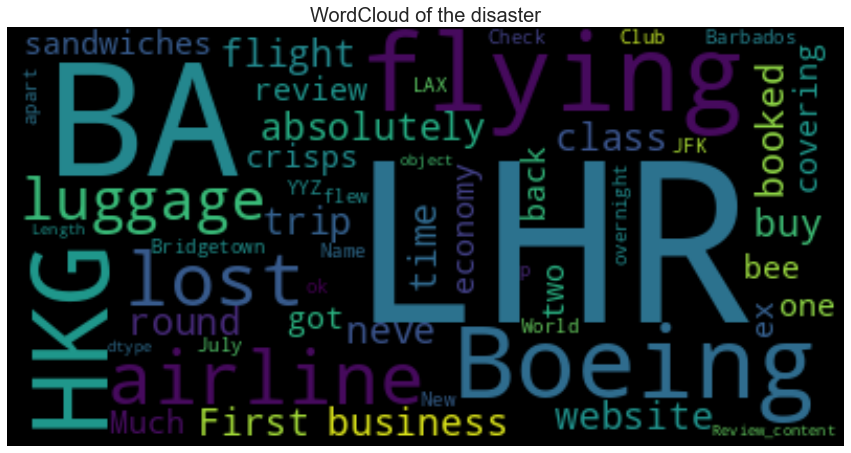

In [151]:
WordCloud_Review_content = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((review_data['Review_content'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_Review_content, interpolation='bilinear')
plt.title('WordCloud of the disaster', fontsize=20)
plt.axis("off")
plt.show()

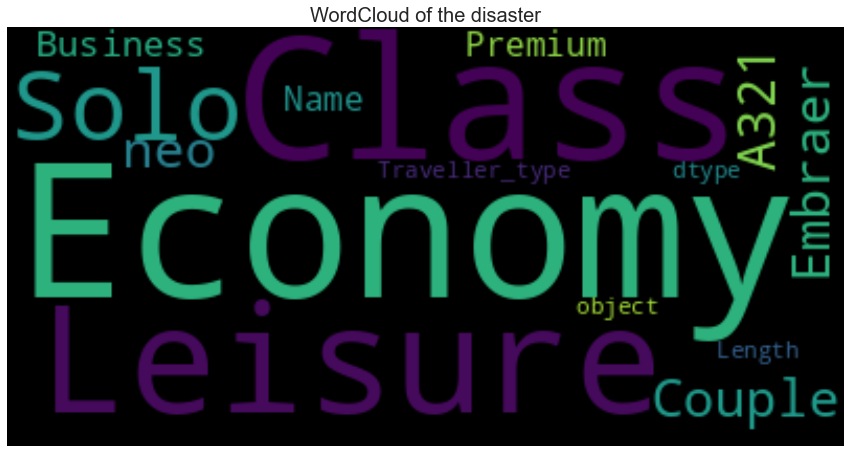

In [152]:
WordCloud_Traveller_type = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((review_data['Traveller_type'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_Traveller_type, interpolation='bilinear')
plt.title('WordCloud of the disaster', fontsize=20)
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='Traveller_type', ylabel='count'>

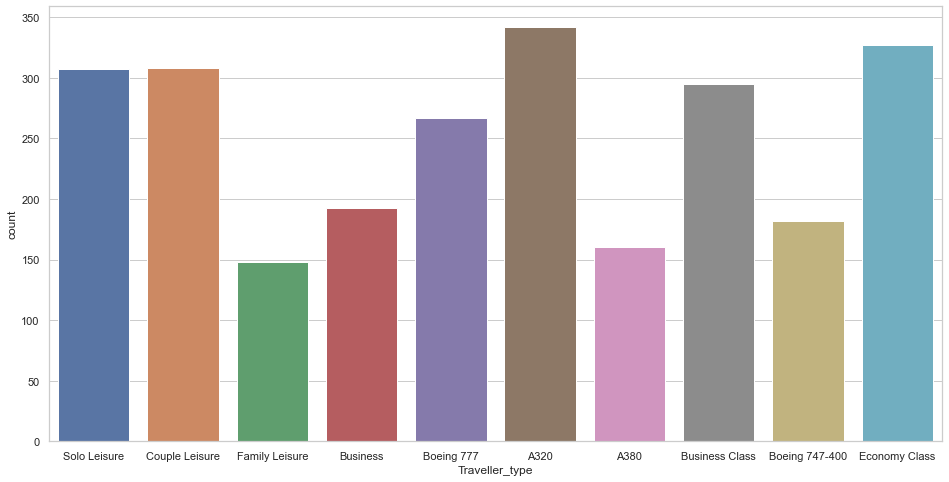

In [153]:
value_counts = review_data['Traveller_type'].value_counts()
top_values = value_counts.head(10)

df_top_values = review_data[review_data['Traveller_type'].isin(top_values.index)]
plt.figure(figsize=(16, 8));ax1 = plt.subplot(1,1,1)
sns.countplot(data=df_top_values, x='Traveller_type')


<AxesSubplot:xlabel='Class', ylabel='count'>

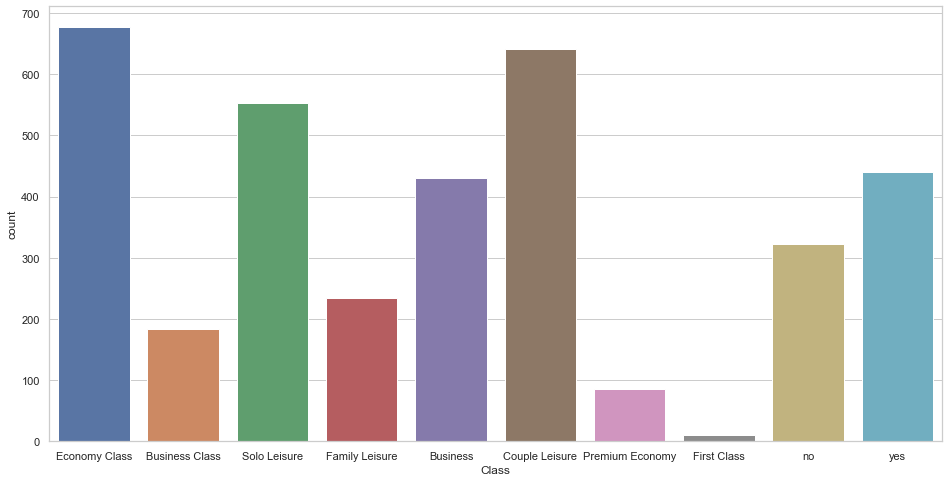

In [154]:
value_counts = review_data['Class'].value_counts()
top_values = value_counts.head(10)

df_top_values = review_data[review_data['Class'].isin(top_values.index)]
plt.figure(figsize=(16, 8));ax1 = plt.subplot(1,1,1)
sns.countplot(data=df_top_values, x='Class')


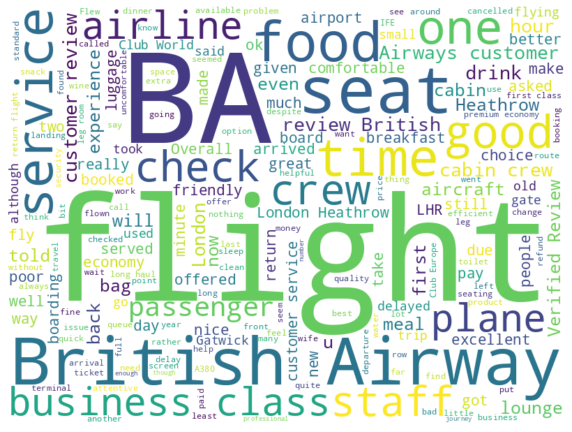

In [155]:
# Concatenate the review title and content into a single string
text = ' '.join(review_data['Review_title']) + ' ' + ' '.join(review_data['Review_content'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()